# Model Selection and Recommendation

### Content

- [Feature Selection](#Feature-Selection)
- [Model Selection](#Model-Selection)
    - [Linear Regression](#Linear-Regression)
    - [Lasso Regression](#Lasso-Regression)
    - [Ridge Regression](#Ridge-Regression)
    - [Model Comparision](#Model-Comparision)
- [Prediction Model](#Prediction-Model)
- [Conclusion](#Conclusion)
- [Recommendation](#Recommendation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

sns.set()

## Feature Selection

In [2]:
train=pd.read_csv('./datasets/train_clean.csv',index_col='Id')

In [3]:
y=train['log_SalePrice']
feature=[column for column in train.columns if (column != 'log_SalePrice')]
X=train[feature]

In [4]:
X.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,NaN,13517,2,2,6,8,289.0,3,2,2,...,0,0,0,0,0,0,0,0,0,1
544,43.0,11492,2,2,7,5,132.0,3,2,3,...,0,0,0,0,0,0,0,0,0,1
153,68.0,7922,3,2,5,7,0.0,2,3,2,...,0,0,0,0,0,0,0,0,0,1
318,73.0,9802,3,2,5,5,0.0,2,2,3,...,0,0,0,0,0,0,0,0,0,1
255,82.0,14235,2,2,6,8,0.0,2,2,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=42
)

In [6]:
X_train['Lot Frontage'].fillna(X_train['Lot Frontage'].median(),inplace=True)
X_test['Lot Frontage'].fillna(X_train['Lot Frontage'].median(),inplace=True)
X['Lot Frontage'].fillna(X['Lot Frontage'].median(),inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
num_column=X_train.columns[:50]

In [8]:
num_column

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Slope', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Electrical', '2nd Flr SF', 'Low Qual Fin SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Finish',
       'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Pool Area', 'Pool QC', 'Fence', 'Garage Age', 'Age', 'Remod Age',
       'log_Gr Liv Area', 'log_1st Flr SF'],
      dtype='object')

In [9]:
ss=StandardScaler()

In [10]:
X_train_scaled=pd.DataFrame(ss.fit_transform(X_train[num_column]),
                            columns=num_column,
                            index=X_train.index)

In [11]:
X_train_scaled

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Enclosed Porch,Screen Porch,Pool Area,Pool QC,Fence,Garage Age,Age,Remod Age,log_Gr Liv Area,log_1st Flr SF
Id,,,,,,,,,,,,,,,,,,,,,
8,-1.207553,-0.899717,-1.065294,0.224247,1.310891,-0.507003,-0.551922,0.999638,-0.222724,0.591080,...,-0.382122,2.239997,-0.07107,-0.0692,-0.484249,0.479721,-0.606224,-0.266561,-0.324275,0.458220
2162,0.446923,-0.127292,-1.065294,0.224247,0.618457,-0.507003,-0.551922,0.999638,-0.222724,0.591080,...,-0.382122,-0.288816,-0.07107,-0.0692,-0.484249,1.083241,-1.165101,-1.072057,0.737847,-0.486968
1872,0.860542,0.144696,-1.065294,0.224247,-0.073978,1.286671,-0.551922,-0.684937,-0.222724,-0.642282,...,-0.382122,-0.288816,-0.07107,-0.0692,1.968948,-0.123799,0.149905,0.823228,-0.818721,-0.023631
244,-0.426273,0.210643,0.708031,0.224247,-1.458847,1.286671,-0.551922,-0.684937,-0.222724,-3.109006,...,-0.382122,-0.288816,-0.07107,-0.0692,-0.484249,-0.727319,0.906034,-0.929911,-1.324322,-0.516351
2118,-0.058611,0.411947,-1.065294,0.224247,-0.073978,2.183509,0.344091,-0.684937,-0.222724,-0.642282,...,-0.382122,-0.288816,-0.07107,-0.0692,-0.484249,-0.123799,0.149905,-1.119439,1.206230,-0.369057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,-1.253511,-1.089362,0.708031,0.224247,-0.073978,-1.403840,-0.551922,-0.684937,-0.222724,0.591080,...,-0.382122,-0.288816,-0.07107,-0.0692,2.786680,-0.123799,-0.113096,0.444171,1.797710,0.484327
231,1.136288,-0.124742,0.708031,0.224247,-1.458847,-1.403840,-0.551922,-0.684937,-0.222724,-1.875644,...,-0.382122,-0.288816,-0.07107,-0.0692,-0.484249,-0.727319,1.530662,1.723489,-1.972828,-1.148338
2573,0.033304,-0.403653,0.708031,0.224247,-0.766413,0.389834,0.132929,-0.684937,-0.222724,-0.642282,...,-0.382122,-0.288816,-0.07107,-0.0692,1.151215,-0.123799,0.248531,0.965375,-0.552525,0.235784


In [12]:
X_train.drop(num_column,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
X_train_scaled=X_train_scaled.merge(X_train,right_on='Id',left_index=True)

In [14]:
X_test_scaled=pd.DataFrame(ss.transform(X_test[num_column]),
                            columns=num_column,
                            index=X_test.index)

In [15]:
X_test.drop(columns=num_column,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
X_test_scaled=X_test_scaled.merge(X_test,right_on='Id',left_index=True)

In [17]:
X_test_scaled

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Misc Feature_TenC,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
Id,,,,,,,,,,,,,,,,,,,,,
2926,-1.483299,-0.365578,-1.065294,0.224247,-0.073978,0.389834,-0.551922,-0.684937,-0.222724,-0.642282,...,0,0,0,0,0,0,0,0,0,1
2072,-0.058611,19.165831,-2.838620,-8.030052,0.618457,-0.507003,1.451266,-0.684937,-0.222724,0.591080,...,0,0,0,0,0,0,0,0,0,1
1013,-0.747976,0.994181,-1.065294,0.224247,2.003326,-0.507003,1.137376,2.684214,-0.222724,1.824442,...,0,0,0,0,0,0,0,0,0,1
1268,-0.426273,-0.499841,0.708031,0.224247,-0.766413,1.286671,-0.551922,-0.684937,-0.222724,-1.875644,...,0,0,0,0,0,0,0,0,0,1
2425,-0.058611,-1.251862,0.708031,0.224247,0.618457,-0.507003,-0.449195,0.999638,-0.222724,0.591080,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,0.952457,0.092958,-1.065294,0.224247,-0.073978,0.389834,0.264192,-0.684937,-0.222724,-0.642282,...,0,0,0,0,0,0,0,0,0,1
870,0.952457,1.057760,0.708031,0.224247,1.310891,-0.507003,0.931921,0.999638,-0.222724,0.591080,...,0,0,0,0,0,0,0,0,0,1
669,0.355008,0.283514,-1.065294,0.224247,-0.073978,-1.403840,-0.551922,-2.369513,-0.222724,-0.642282,...,0,0,0,0,0,0,0,0,0,1


In [18]:
X_train_scaled.shape

(1638, 202)

In [19]:
X_test_scaled.shape

(410, 202)

In [20]:
lasso_cv=LassoCV(n_alphas=150,cv=5)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5, n_alphas=150)

In [21]:
lasso_model=Lasso(alpha=lasso_cv.alpha_)

In [22]:
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.001145829003586395)

In [23]:
filtered_feature=pd.DataFrame(zip(feature,
                                  lasso_model.coef_,
                                  abs(lasso_model.coef_)),columns=['feature','coef','abs_coef'])

In [24]:
filtered_feature.sort_values(by='abs_coef', ascending=False).head(50)

,feature,coef,abs_coef
48,log_Gr Liv Area,0.104506,0.104506
4,Overall Qual,0.079348,0.079348
67,MS Zoning_C (all),-0.072220,0.072220
103,Neighborhood_NridgHt,0.065695,0.065695
49,log_1st Flr SF,0.057102,0.057102
140,Exterior 1st_AsbShng,-0.056576,0.056576
90,Neighborhood_Crawfor,0.054406,0.054406
46,Age,-0.051175,0.051175
143,Exterior 1st_BrkFace,0.050342,0.050342
5,Overall Cond,0.047546,0.047546


From the table above, we will be choosing these 30 variables for our modelling

In [25]:
filtered=list(filtered_feature.sort_values(by='abs_coef', ascending=False)[:30]['feature'])

In [26]:
X_train_scaled_filtered=X_train_scaled[filtered]
X_test_scaled_filtered=X_test_scaled[filtered]

## Model Selection

### Linear Regression

In [27]:
lr_model=LinearRegression()

In [28]:
np.sqrt(-cross_val_score(
                lr_model,
                X_train_scaled_filtered,
                y_train,
                scoring='neg_mean_squared_error',
                cv=5
).mean())

0.13596700408571005

In [29]:
lr_model.fit(X_train_scaled_filtered,y_train)

LinearRegression()

In [30]:
lr_prediction=lr_model.predict(X_test_scaled_filtered)

In [31]:
lr_rmse=np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(lr_prediction)))

In [32]:
lr_residual=np.exp(y_test)-np.exp(lr_prediction)

### Lasso Regression

In [33]:
lasso_cv=LassoCV(n_alphas=150,cv=5)

In [34]:
lasso_cv.fit(X_train_scaled_filtered,y_train)

LassoCV(cv=5, n_alphas=150)

In [35]:
lasso_model=Lasso(alpha=lasso_cv.alpha_)

In [36]:
lasso_cv.alpha_

0.0003432652798281517

In [37]:
np.sqrt(-cross_val_score(
                lasso_model,
                X_train_scaled_filtered,
                y_train,
                scoring='neg_mean_squared_error',
                cv=5
).mean())

0.13611312266339984

In [38]:
lasso_model.fit(X_train_scaled_filtered,y_train)

Lasso(alpha=0.0003432652798281517)

In [39]:
las_prediction=lasso_model.predict(X_test_scaled_filtered)

In [40]:
las_residual=np.exp(y_test)-np.exp(las_prediction)

In [41]:
lasso_rmse=np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(las_prediction)))

### Ridge Regression

In [42]:
r_alphas=np.logspace(0,10,200)
ridge_cv=RidgeCV(alphas=r_alphas, store_cv_values=True)

In [43]:
ridge_cv.fit(X_train_scaled_filtered,y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.12266777e+00, 1.26038293e+00, 1.41499130e+00,
       1.58856513e+00, 1.78343088e+00, 2.00220037e+00, 2.24780583e+00,
       2.52353917e+00, 2.83309610e+00, 3.18062569e+00, 3.57078596e+00,
       4.00880633e+00, 4.50055768e+00, 5.05263107e+00, 5.67242607e+00,
       6.36824994e+00, 7.14942899e+00, 8.02643352e+00, 9.01101825e+00,
       1.01163798e+01, 1.13573336e+0...
       6.98587975e+08, 7.84282206e+08, 8.80488358e+08, 9.88495905e+08,
       1.10975250e+09, 1.24588336e+09, 1.39871310e+09, 1.57029012e+09,
       1.76291412e+09, 1.97916687e+09, 2.22194686e+09, 2.49450814e+09,
       2.80050389e+09, 3.14403547e+09, 3.52970730e+09, 3.96268864e+09,
       4.44878283e+09, 4.99450512e+09, 5.60716994e+09, 6.29498899e+09,
       7.06718127e+09, 7.93409667e+09, 8.90735464e+09, 1.00000000e+10]),
        store_cv_values=True)

In [44]:
ridge_cv.alpha_

5.052631065335681

In [45]:
ridge_model=Ridge(alpha=ridge_cv.alpha_)

In [46]:
np.sqrt(-cross_val_score(
                ridge_model,
                X_train_scaled_filtered,
                y_train,
                scoring='neg_mean_squared_error',
                cv=5
).mean())

0.1355201664133573

In [47]:
ridge_model.fit(X_train_scaled_filtered,y_train)

Ridge(alpha=5.052631065335681)

In [48]:
r_prediction=ridge_model.predict(X_test_scaled_filtered)

In [49]:
r_residual=np.exp(y_test)-np.exp(r_prediction)

In [50]:
ridge_rmse=np.sqrt(metrics.mean_squared_error(np.exp(y_test),np.exp(r_prediction)))

### Model Comparision

In [51]:
pd.DataFrame([[lr_rmse,lasso_rmse,ridge_rmse]],columns=['linear','lasso','ridge'])

,linear,lasso,ridge
0,23089.279801,22826.903495,22759.740857


From the comparision of root mean squared score of the 3 model. Ridge Regression have the lowest RMSE and hence we will be using the ridge for our final modeling

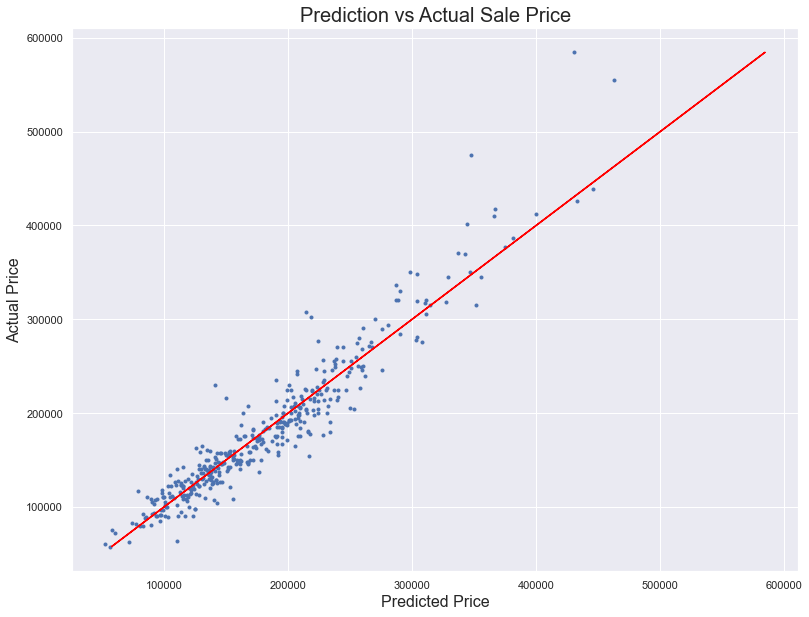

In [52]:
plt.figure(figsize=[13,10])
plt.scatter(np.exp(r_prediction),
            np.exp(y_test),
            marker='.',
            label='Ridge')
plt.xlabel('Predicted Price',size=16)
plt.ylabel('Actual Price',size=16)
plt.title('Prediction vs Actual Sale Price',size=20)
plt.plot(np.exp(y_test),np.exp(y_test),c='red')

A plot of the predicted Price and target price show that most of the predicted price are quite close to actual price when price is lesser than 300,000. However, it start to divert when it's more than 300,000 and predicted price start to fall below the actual price

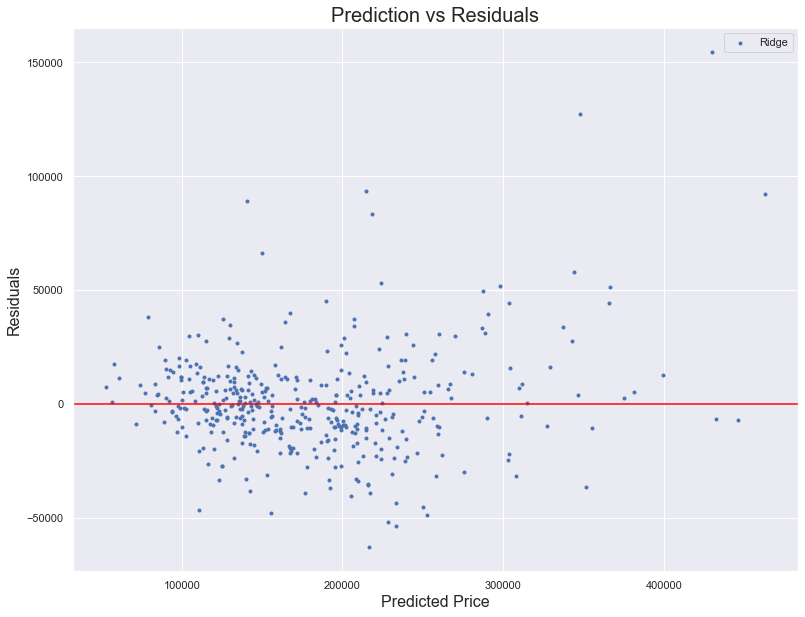

In [53]:
plt.figure(figsize=[13,10])
plt.scatter(np.exp(r_prediction),
            r_residual,
            marker='.',
            label='Ridge')
plt.xlabel('Predicted Price',size=16)
plt.ylabel('Residuals',size=16)
plt.title('Prediction vs Residuals',size=20)
plt.legend()
plt.axhline(0,c='red')

As expected from the residual plot again the predicted price, at lower price, the residual is randomly scatter around which show that the assumption of homoscedasticity is true. However, the model are not able to accurately price at higher price

## Prediction Model

In [54]:
test=pd.read_csv('./datasets/test_clean.csv')

In [55]:
test.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,...,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,0,2658,902301120,190,69.0,9142,3,2,6,8,...,0,0,0,0,0,0,0,0,0,1
1,1,2718,905108090,90,68.0,9662,2,2,5,4,...,0,0,0,0,0,0,0,0,0,1
2,2,2414,528218130,60,58.0,17104,2,2,7,5,...,0,0,0,0,0,0,1,0,0,0
3,3,1989,902207150,30,60.0,8520,3,2,5,6,...,0,0,0,0,0,0,0,0,0,1
4,4,625,535105100,20,68.0,9500,2,2,6,5,...,0,0,0,0,0,0,0,0,0,1


In [56]:
test.drop(columns='Unnamed: 0',inplace=True)

In [57]:
test.set_index('Id',inplace=True)

In [58]:
for feature in filtered:
    if feature not in test.columns:
        print(feature)

In [59]:
test[num_column]

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Enclosed Porch,Screen Porch,Pool Area,Pool QC,Fence,Garage Age,Age,Remod Age,log_Gr Liv Area,log_1st Flr SF
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,3,2,6,8,0.0,2,1,1,...,112,0,0,0,0,1,96,56,7.564238,6.811244
2718,68.0,9662,2,2,5,4,0.0,2,2,3,...,0,0,0,0,0,4,29,29,7.584265,7.584265
2414,58.0,17104,2,2,7,5,0.0,3,2,3,...,0,0,0,0,0,6,0,0,7.310550,6.498282
1989,60.0,8520,3,2,5,6,0.0,3,2,2,...,184,0,0,0,0,2,84,1,6.875232,6.875232
625,68.0,9500,2,2,6,5,247.0,2,2,3,...,0,185,0,0,0,4,46,46,7.239933,7.239933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,80.0,8000,3,2,6,6,0.0,2,2,2,...,0,0,0,0,0,4,33,33,7.537430,6.988413
1234,90.0,14670,3,2,6,7,410.0,3,3,2,...,0,0,0,0,3,4,42,9,7.594884,7.006695
1373,55.0,8250,3,2,5,5,0.0,2,2,2,...,0,0,0,0,0,4,40,40,7.099202,7.099202


In [60]:
ss=StandardScaler()

In [61]:
X_scaled=pd.DataFrame(ss.fit_transform(X[num_column]),
                            columns=num_column,
                            index=X.index)

In [62]:
X.drop(columns=num_column,axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
X_scaled=X_scaled.merge(X,right_on='Id',left_index=True)

In [64]:
test_scaled=pd.DataFrame(ss.transform(test[num_column]),
                            columns=num_column,
                            index=test.index)

In [65]:
test.drop(columns=num_column,axis=1,inplace=True)

In [66]:
test_scaled=test_scaled.merge(test,right_on='Id',left_index=True)

In [67]:
X_scaled=X_scaled[filtered]

In [68]:
X_scaled.shape

(2048, 30)

In [69]:
test_scaled=test_scaled[filtered]

In [70]:
test_scaled.shape

(879, 30)

In [71]:
r_alphas=np.logspace(0,10,200)
ridge_cv=RidgeCV(alphas=r_alphas, store_cv_values=True)

In [72]:
ridge_cv.fit(X_scaled,y)

RidgeCV(alphas=array([1.00000000e+00, 1.12266777e+00, 1.26038293e+00, 1.41499130e+00,
       1.58856513e+00, 1.78343088e+00, 2.00220037e+00, 2.24780583e+00,
       2.52353917e+00, 2.83309610e+00, 3.18062569e+00, 3.57078596e+00,
       4.00880633e+00, 4.50055768e+00, 5.05263107e+00, 5.67242607e+00,
       6.36824994e+00, 7.14942899e+00, 8.02643352e+00, 9.01101825e+00,
       1.01163798e+01, 1.13573336e+0...
       6.98587975e+08, 7.84282206e+08, 8.80488358e+08, 9.88495905e+08,
       1.10975250e+09, 1.24588336e+09, 1.39871310e+09, 1.57029012e+09,
       1.76291412e+09, 1.97916687e+09, 2.22194686e+09, 2.49450814e+09,
       2.80050389e+09, 3.14403547e+09, 3.52970730e+09, 3.96268864e+09,
       4.44878283e+09, 4.99450512e+09, 5.60716994e+09, 6.29498899e+09,
       7.06718127e+09, 7.93409667e+09, 8.90735464e+09, 1.00000000e+10]),
        store_cv_values=True)

In [73]:
ridge_model=Ridge(alpha=lasso_cv.alpha_)

In [74]:
ridge_model.fit(X_scaled,y)

Ridge(alpha=0.0003432652798281517)

In [75]:
ridge_model.predict(test_scaled)

array([11.70381705, 11.98165211, 12.23485207, 11.5842824 , 12.11963362,
       11.42994968, 11.59170143, 11.96433867, 12.12087871, 11.99036781,
       11.96195202, 11.72216525, 11.93135016, 12.59382944, 11.95500294,
       11.68879594, 11.74309962, 11.66779418, 12.09125185, 12.05994174,
       11.93069666, 11.74265857, 12.15055935, 11.88590094, 12.13939688,
       11.70546923, 11.67163074, 11.60833554, 11.96168018, 11.18810405,
       11.59636838, 11.52522113, 12.23764607, 11.9214534 , 12.30952438,
       12.00502781, 11.71282125, 11.48218177, 11.74000744, 12.18635519,
       11.91428011, 12.21111592, 11.97177441, 12.04529237, 12.25398201,
       11.51703778, 12.32429907, 11.66826321, 11.85109045, 11.68134801,
       11.60367579, 12.23314627, 12.35397127, 11.69252282, 11.58879589,
       12.03461434, 12.15109337, 11.84753188, 11.93387259, 12.39845327,
       12.57834631, 11.65480473, 11.78968243, 12.11905919, 12.11004402,
       12.55827601, 11.44720085, 12.20391469, 11.20137563, 11.80

In [76]:
test_scaled['SalePrice']=np.exp(ridge_model.predict(test_scaled))

In [77]:
submission=test_scaled[['SalePrice']].sort_index()

In [78]:
submission

,SalePrice
Id,
2,104375.708451
4,268768.701464
6,185763.274914
7,227485.962133
17,227992.716574
...,...
2919,82266.182274
2921,88139.599370
2922,163145.838878


In [79]:
submission.to_csv('./datasets/submission.csv',index_label='Id')

## Conclusion

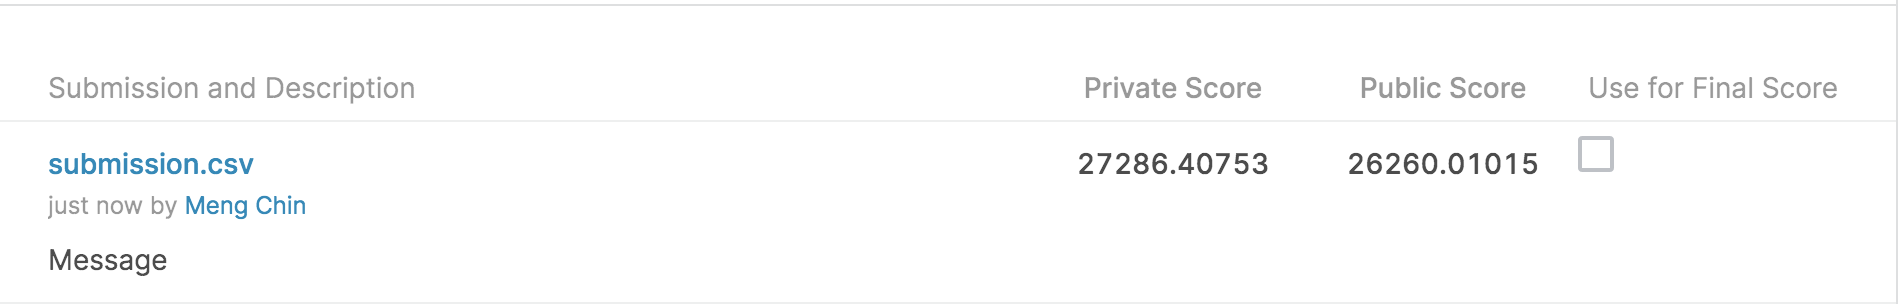

In [80]:
pd.DataFrame(zip(filtered,
            ridge_model.coef_),
            columns=['feature','coef']).sort_values(by='coef',ascending=False)

,feature,coef
14,Neighborhood_StoneBr,0.112115
8,Exterior 1st_BrkFace,0.110998
3,Neighborhood_NridgHt,0.109849
0,log_Gr Liv Area,0.103037
6,Neighborhood_Crawfor,0.094874
11,Bldg Type_1Fam,0.086423
1,Overall Qual,0.082273
4,log_1st Flr SF,0.077953
10,MS Zoning_RL,0.060687
23,Neighborhood_Somerst,0.056795


### Predictor for Higher Sale Price

##### Housing Space
- Above Grade Living Area
- 1st Floor Squared Feet
- 2nd Floor Squared Feet
- Garage Cars
- Basement Full Bath
- Screen Porch area

##### House Quality
- Overall Quality
- Overall Condition
- Functional
- Exterior Quality
- Basement Qualilty
- Rating of Basement Finish Type 1
- Heating Quality

It should come at no surprise that the sale price of the apartment have strong positive relationship with the space and quality of the apartment. While age of the apartment plays a big part in bringing down the price.

#### Positive features
- Exterior type - Brick Face
- Single-family Detached
- Hillside - Significant slope from side to side
- Proximity to various conditions(Normal)
- New homes

#### Negative features
- Banked - Quick and significant rise from street grade to building
- Exterior type - Asbestos Shingles

Some of the features of the house that could value add to the apartment and some of the features that should be avoided are shown above

#### Neighborhood
- Stone Brook
- Northridge Heights
- Crawford
- Somerset
- Brookside

It seem that there is a preference in the above neighborhood which drive the housing price in these neighborhood higher. Family who are on a budget can focus on finding an apartment in Edwards instead for a bargain.


#### MS Zoning
- Residential Low Density
- Floating Village Residential

While the above zone are fetching a higher price, housing that are within the Commercial zone seem less ideal.

## Recommendation

This model will be able to help both the buyers and the sellers to provide an estimate of the sale price of the houses. Additionally, it also show the buyers and sellers the features that might affect the sale price. This will allow buyers to set a proper budget based on the features or neighborhood that they are interested in while allowing seller to determine areas that they could worked on to improve their house's value.

However, it could be seen that this model will start to diverge at higher prices. Hence, for future improvement. We could attempt to create a second regression model that would help us to more accurately predict housing price for higher end apartment.